In [715]:
import numpy as np
import scipy
from scipy import linalg
from scipy import optimize
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [488]:
df = pd.read_csv('data/data_4.csv')

# Предположение 1. Система линейно-зависима.

## Система из 4 уравнений

Коэффциенты линейного уравнения: [21.91401756 -4.88818991  3.52799359 -9.87567871]
Среднеквадратичное отклонение 90.22749153837277


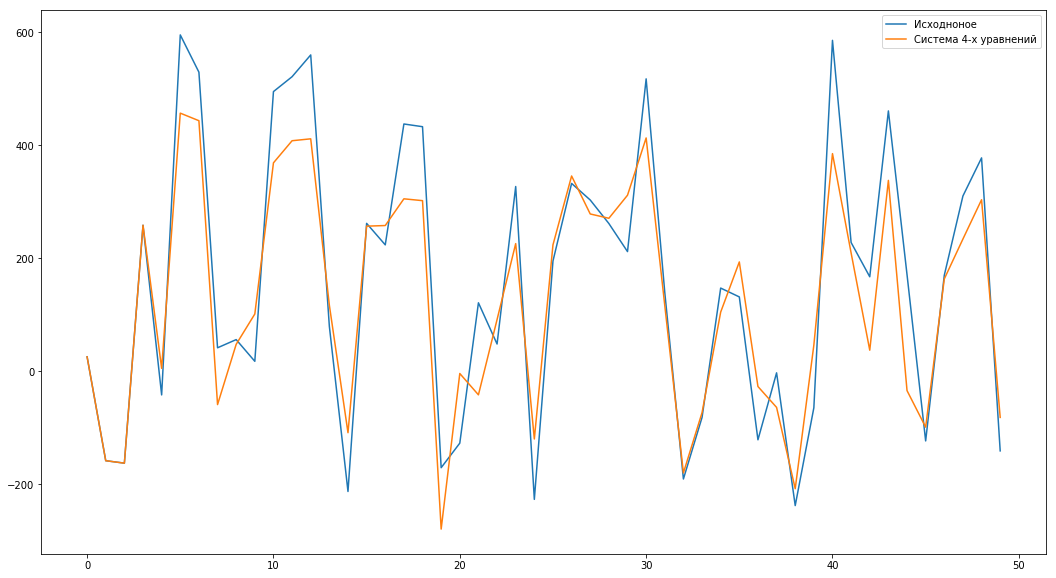

In [730]:
c = 0
k = c + 4
x = np.array([df.x1[c:k], df.x2[c:k], df.x3[c:k], df.x4[c:k]]).T
y = np.array(df.y[c:k])

answer = np.linalg.solve(x, y)
print('Коэффциенты линейного уравнения:', answer)
df['solve_y'] = df.x1 * answer[0] + df.x2 * answer[1] + df.x3 * answer[2] + df.x4 * answer[3]


fig, ax = plt.subplots(1,1, figsize=[18,10])
ax.plot(df.y)
ax.plot(df.solve_y);
ax.legend(['Исходноное', 'Система 4-х уравнений']);

print('Среднеквадратичное отклонение', (np.sqrt(mean_squared_error(df.y, df.solve_y))))

# Предположение 2. Система линейно-зависима.

## Усредненная система 4 уравнений (12)

In [751]:
a = []

for c in range(0, 45, 4):
    k = c + 4
    x = np.array([df.x1[c:k], df.x2[c:k], df.x3[c:k], df.x4[c:k]]).T
    y = np.array(df.y[c:k])
    answer = np.linalg.solve(x, y)
    a.append(answer)
    
a = np.array(a).T
answer = [np.mean(a[0]), np.mean(a[1]), np.mean(a[2]), np.mean(a[3])]

Коэффциенты линейного уравнения: [23.064639724810785, 0.8007303806744134, 0.32889808288199535, -11.914793579368494]
Среднеквадратичное отклонение 84.81107346662381


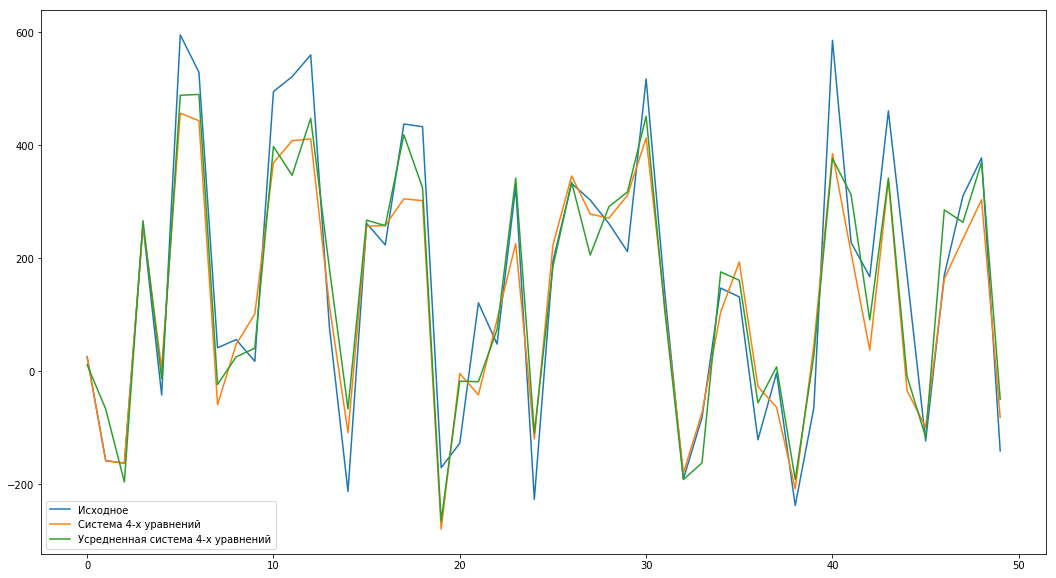

In [752]:
df['solve_mean_y'] = df.x1 * answer[0] + df.x2 * answer[1] + df.x3 * answer[2] + df.x4 * answer[3]
print('Коэффциенты линейного уравнения:', answer)

fig, ax = plt.subplots(1,1, figsize=[18,10])
ax.plot(df.y)
ax.plot(df.solve_y);
ax.plot(df.solve_mean_y);
ax.legend(['Исходное', 'Система 4-х уравнений', 'Усредненная система 4-х уравнений']);

print('Среднеквадратичное отклонение', (np.sqrt(mean_squared_error(df.y, df.solve_mean_y))))

# Предположение 3. 
## Приближение с МНК 

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  after removing the cwd from sys.path.


[ 23.06016678  -0.81241229   9.06115927 -16.775652  ]
Коэффциенты линейного уравнения: [ 23.06016678  -0.81241229   9.06115927 -16.775652  ]
Среднеквадратичное отклонение 48.42092067920638


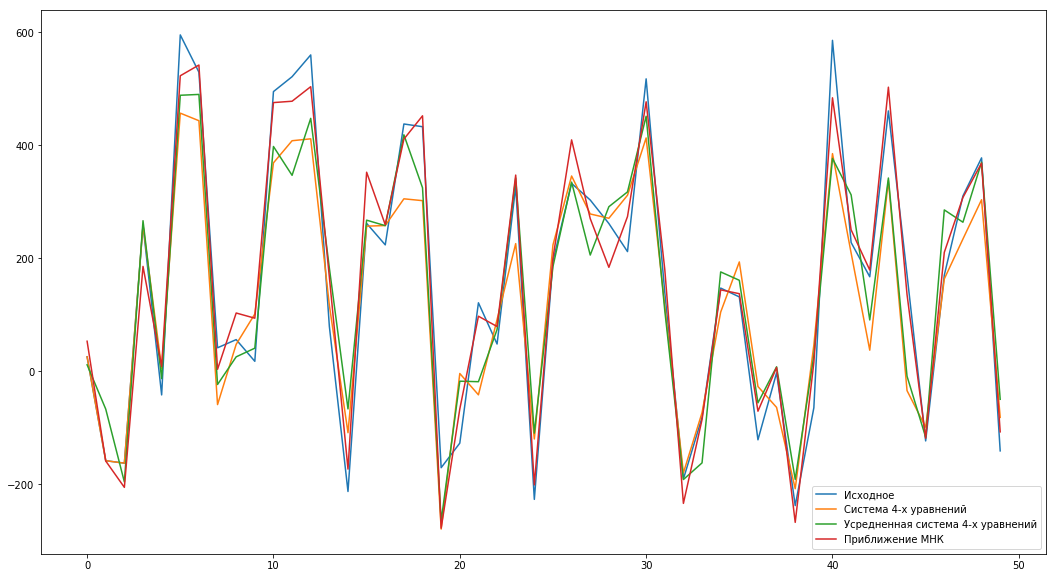

In [755]:
x = np.array([df.x1, df.x2, df.x3, df.x4]).T
y = np.array(df.y)

answer = np.linalg.lstsq(x, y)[0]
print(answer)
df['lstsq_y'] = df.x1 * answer[0] + df.x2 * answer[1] + df.x3 * answer[2] + df.x4 * answer[3]

fig, ax = plt.subplots(1,1, figsize=[18,10])
ax.plot(df.y)
ax.plot(df.solve_y)
ax.plot(df.solve_mean_y)
ax.plot(df.lstsq_y);
ax.legend(['Исходное', 'Система 4-х уравнений', 'Усредненная система 4-х уравнений', 'Приближение МНК']);
print('Коэффциенты линейного уравнения:', answer)
print('Среднеквадратичное отклонение', (np.sqrt(mean_squared_error(df.y, df.lstsq_y))))

# Заключение
##### Система 4-х уравнений. Стандартное отклонение - 90.22749153837277
##### Усредненная система 4-х уравнений. Стандартное отклонение - 84.81107346662381
##### Приближение МНК. Стандартное отклонение - 48.42092067920638
#### Из стандартного отклонения следует, что методом наименьших квадратов удалось максимально приблизиться к исходной ф-ии. Уравнение с коэффициентами, полученными методом приближения, будет следующего вида:

$ 23.06016678 * X_1 -0.81241229 * X_2 + 9.06115927 * X_3 - 16.775652 * X_4 = Y $